In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

# Tutoria - 18/03/2025

Nesta tutoria, vamos explorar alguns conjuntos de dados conhecidos e coloca em prática alguns conceitos aprendidos em aula. Ao longo da análise, iremos nos deparar com problemas que nos mostram por que é importante, além de obter as medidas descritivas, a construção de gráficos.

### Conjunto Datasaurus

Façamos uma breve análise do conjunto de dados Datasaurus Dozen (https://en.wikipedia.org/wiki/Datasaurus_dozen). Este conjunto de dados conta com 13 diferentes nuvens de pontos entre duas variáveis, X e Y.

In [2]:
df_datasaurus = pd.read_csv("https://raw.githubusercontent.com/algoplexity/DatasaurusDozen/refs/heads/main/DatasaurusDozen.tsv", sep = "\t")
df_datasaurus.head(5)

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


In [3]:
df_datasaurus["dataset"].unique()

array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

Comecemos fazendo uma análise descritiva de cada conjunto de dados.

In [4]:
# Agrupa os dados segundo a variável "dataset" e exibe um resumo em cada um deles
summary = df_datasaurus.groupby("dataset").describe()

print("Variável X")
display(summary["x"])

print("Variável Y")
display(summary["y"])

Variável X


,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
away,142.0,54.266100,16.769825,15.560750,39.724115,53.340296,69.146597,91.639961
bullseye,142.0,54.268730,16.769239,19.288205,41.627968,53.842088,64.798900,91.735539
circle,142.0,54.267320,16.760013,21.863581,43.379116,54.023213,64.972672,85.664761
dino,142.0,54.263273,16.765142,22.307700,44.102600,53.333300,64.743600,98.205100
dots,142.0,54.260303,16.767735,25.443526,50.359707,50.976768,75.197363,77.954435
h_lines,142.0,54.261442,16.765898,22.003709,42.293828,53.069678,66.768274,98.288123
high_lines,142.0,54.268805,16.766704,17.893499,41.535981,54.168689,63.952667,96.080519
slant_down,142.0,54.267849,16.766759,18.109472,42.890931,53.135159,64.469989,95.593416
slant_up,142.0,54.265882,16.768853,20.209778,42.810866,54.261345,64.488010,95.260528


Variável Y


,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
away,142.0,47.834721,26.939743,0.015119,24.625892,47.535269,71.803148,97.475771
bullseye,142.0,47.830823,26.935727,9.691547,26.244735,47.382937,72.532852,85.876229
circle,142.0,47.837717,26.930036,16.326546,18.349610,51.025022,77.782382,85.578134
dino,142.0,47.832253,26.935403,2.948700,25.288450,46.025600,68.525675,99.487200
dots,142.0,47.839829,26.930192,15.771892,17.107141,51.299291,82.881589,94.249328
h_lines,142.0,47.830252,26.939876,10.463915,30.479911,50.473527,70.349471,90.458936
high_lines,142.0,47.835450,26.939998,14.913962,22.920843,32.499203,75.940022,87.152208
slant_down,142.0,47.835896,26.936105,0.303872,27.840858,46.401314,68.439430,99.644179
slant_up,142.0,47.831496,26.938608,5.645777,24.756248,45.292238,70.855844,99.579591


Todas as estatísticas parecem muitos próximas umas das outras. Façamos uma visualização das distribuições de cada uma das variáveis.

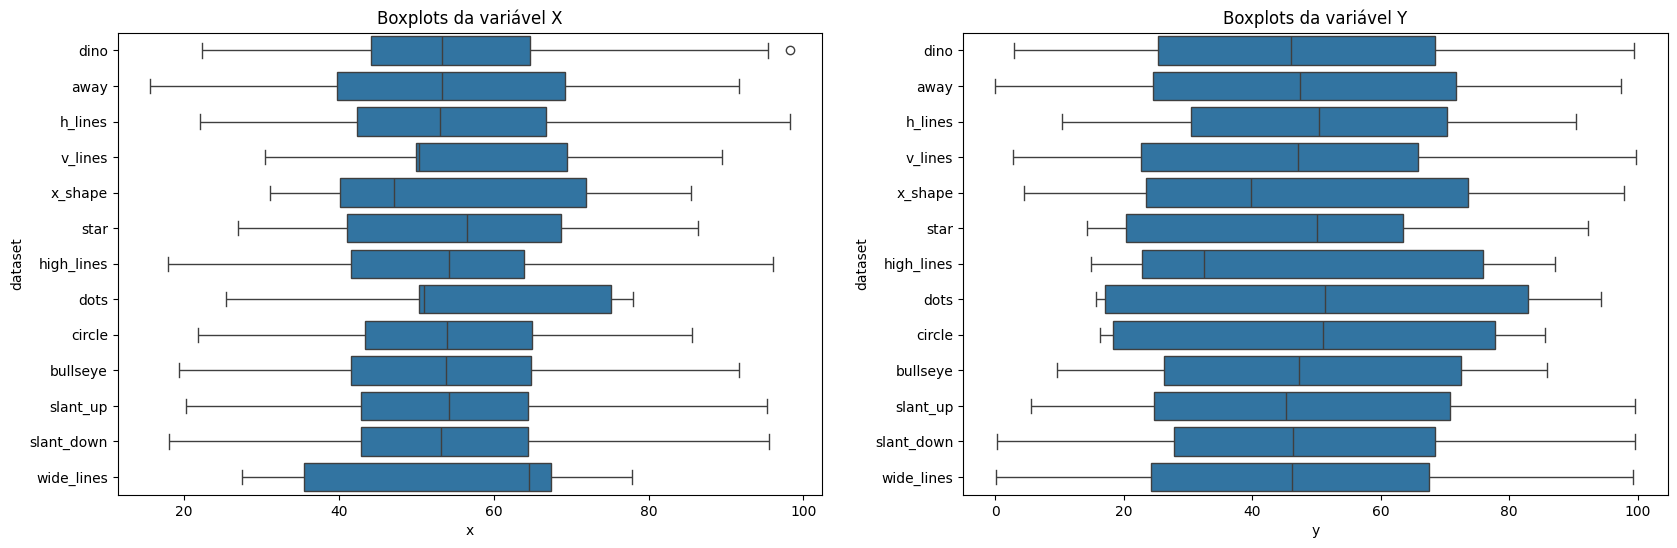

In [5]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))

sns.boxplot(x = "x", y = "dataset", data = df_datasaurus, ax = ax[0])
sns.boxplot(x = "y", y = "dataset", data = df_datasaurus, ax = ax[1])

ax[0].set_title("Boxplots da variável X")
ax[1].set_title("Boxplots da variável Y")

plt.show()

De fato, a maior diferença nas distribuições de X e Y em diferentes grupos de dados se dá na forma das distribuições apenas, mas não em suas médias e variâncias. Por exemplo, a disposição de X nos dados "dino" aparenta ter uma distribuição simétrica, enquanto que em "wide_lines", parece existir uma assimetria à esquerda (verifique com o histograma!), por exemplo. Façamos uma função para analisar cada gráfico individualmente.

In [6]:
def plot_datasaurus(df, dataset = "dino"):
    # Configuração da figura com subplots
    fig, ax = plt.subplots(2, 2, figsize=(14, 8), gridspec_kw={'height_ratios': [1, 10]})
    # Boxplots
    sns.boxplot(x = df.loc[df["dataset"] == dataset, "x"], ax = ax[0, 0])
    sns.boxplot(x = df.loc[df["dataset"] == dataset, "y"], ax = ax[0, 1])
    # Histogramas
    sns.histplot(df.loc[df["dataset"] == dataset, "x"], kde = True, ax = ax[1, 0])
    sns.histplot(df.loc[df["dataset"] == dataset, "y"], kde = True, ax = ax[1, 1])

In [7]:
print("Datasets disponíveis:\n{}".format(df_datasaurus.dataset.unique()) )

Datasets disponíveis:
['dino' 'away' 'h_lines' 'v_lines' 'x_shape' 'star' 'high_lines' 'dots'
 'circle' 'bullseye' 'slant_up' 'slant_down' 'wide_lines']


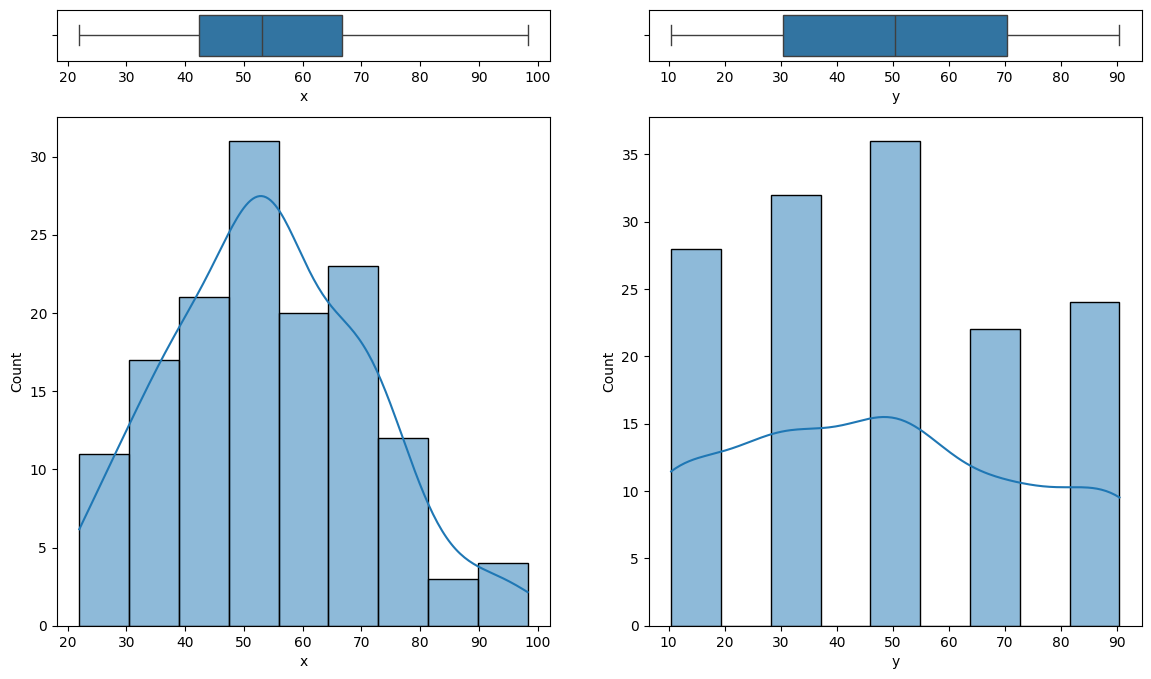

In [8]:
# Dino, h_lines, wide_lines..

# ['dino' 'away' 'h_lines' 'v_lines' 'x_shape' 'star' 'high_lines' 'dots', 'circle' 'bullseye' 'slant_up' 'slant_down' 'wide_lines'].
plot_datasaurus(df_datasaurus, dataset = "h_lines")

É muito útil conhecermos as distribuições de cada variável, mas na maior parte das vezes, o verdadeiro propósito de uma análise de dados é a análise da interação entre as variáveis. Até o momento, foi possível identificar que os 13 conjuntos de dados tem um comportamento muito similar entre si quando comparamos as distribuições das suas respectivas variáveis X e Y. Como veremos agora, ao considerar a interação entre X e Y, entretanto, os conjuntos de dados passam a ser completamente diferentes.

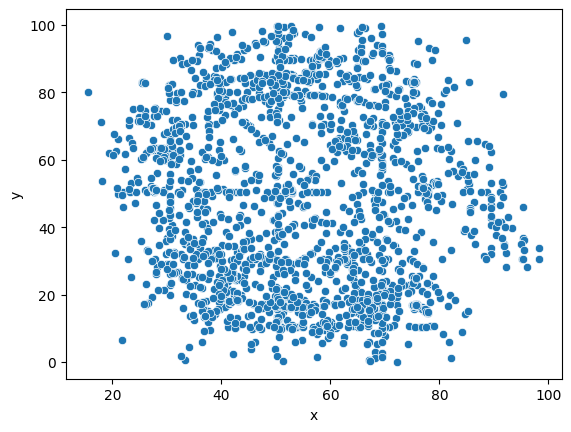

In [9]:
# Se não consideramos diferença entre os grupos, obtemos uma grande nuvem de pontos.
sns.scatterplot(x = "x", y = "y", data = df_datasaurus)
plt.show()

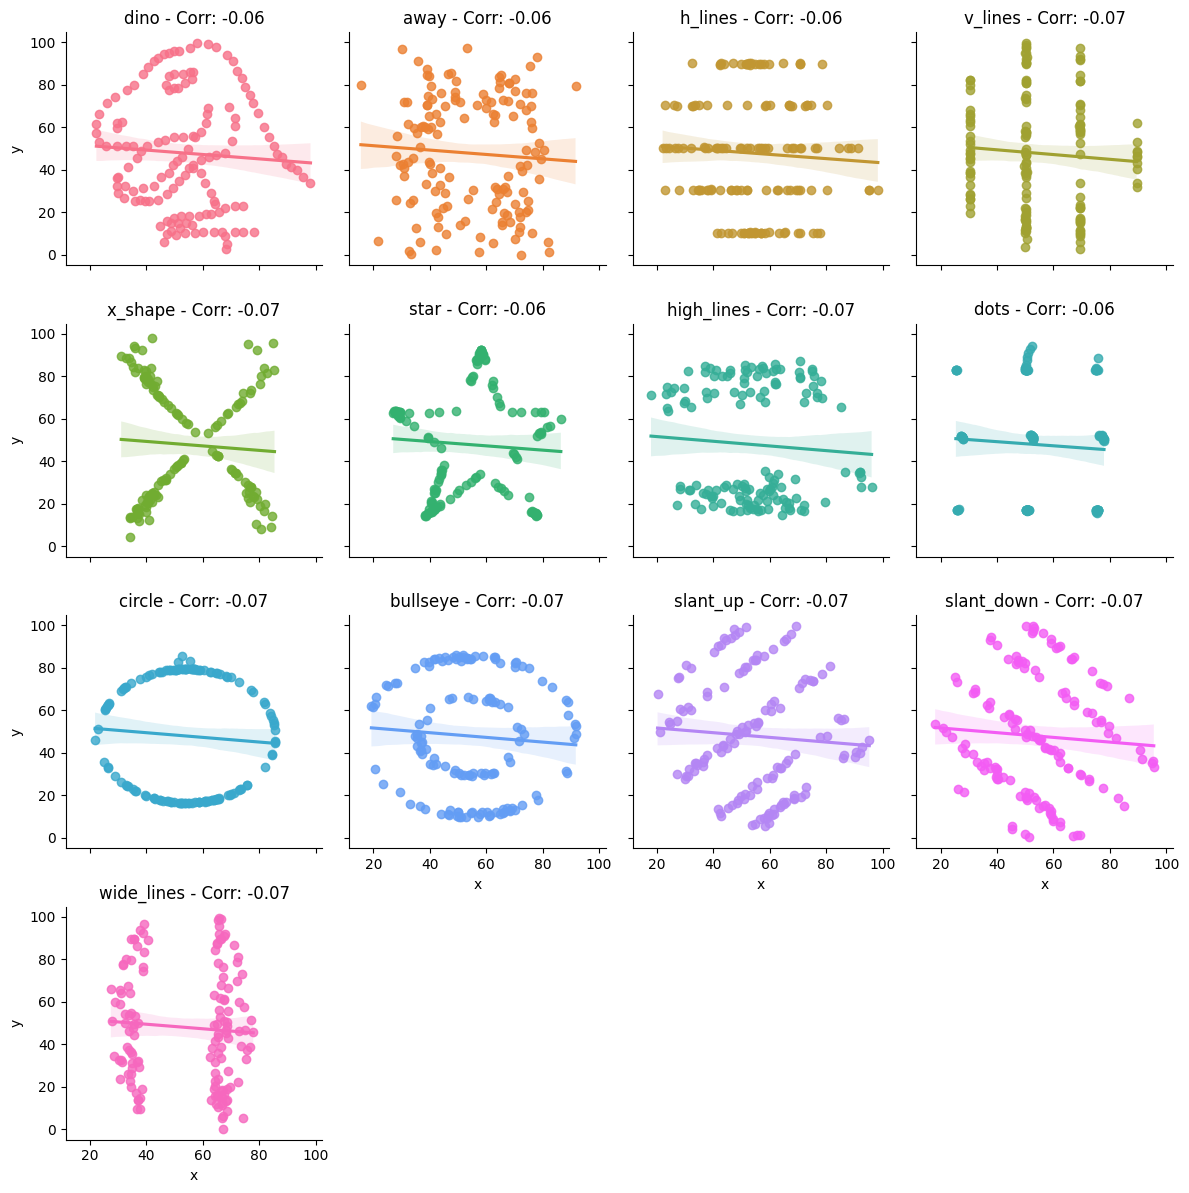

In [10]:
g = sns.FacetGrid(data = df_datasaurus, col="dataset", hue="dataset", col_wrap = 4)
g.map_dataframe(sns.regplot, x = "x", y = "y")

# Percorre todas as células do gráfico e define como título a correlação entre X e Y
for i in range(len(g.axes)):
    dataset = g.axes[i].title.get_text().split(" = ")[-1]
    x = df_datasaurus.loc[df_datasaurus["dataset"] == dataset, "x"]
    y = df_datasaurus.loc[df_datasaurus["dataset"] == dataset, "y"]
    corr = np.corrcoef(x,y)[0,1]
    g.axes[i].set_title("{} - Corr: {}".format(dataset, np.round(corr, 2)))

plt.show()